# NLP - M2 Data Science

## Recursive deep models for semantic compositionality over a sentiment treebank

This notebook provides some simple data exploration on SST and present an easy demo of the model presented in the paper ***Recursive deep models for semantic compositionality over a sentiment treebank*** by Socher et al. 2013, which is a feature of the Java [Stanford CoreNLP](https://stanfordnlp.github.io/CoreNLP/) package.



# Stanford Sentiment Treebank (SST)




The first of this notebook aims at explore and analyse the SST dataset. 
Let's first download the different configurations of SST we can find in the **datasets** library.

In [1]:
# Load the data
!pip install datasets
from datasets import load_dataset

dataset = load_dataset("sst", "default")
data_dict = load_dataset("sst", "dictionary")
data_ptb = load_dataset("sst", "ptb")

     |████████████████████████████████| 290 kB 32.4 MB/s 
     |████████████████████████████████| 59 kB 5.9 MB/s 
     |████████████████████████████████| 1.1 MB 37.7 MB/s 
     |████████████████████████████████| 132 kB 44.0 MB/s 
     |████████████████████████████████| 243 kB 44.2 MB/s 
     |████████████████████████████████| 271 kB 41.4 MB/s 
     |████████████████████████████████| 192 kB 50.6 MB/s 
     |████████████████████████████████| 160 kB 53.8 MB/s 


Downloading:   0%|          | 0.00/2.59k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.37M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/790k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset sst downloaded and prepared to /root/.cache/huggingface/datasets/sst/default/1.0.0/b8a7889ef01c5d3ae8c379b84cc4080f8aad3ac2bc538701cbe0ac6416fb76ff. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

Dataset sst downloaded and prepared to /root/.cache/huggingface/datasets/sst/dictionary/1.0.0/b8a7889ef01c5d3ae8c379b84cc4080f8aad3ac2bc538701cbe0ac6416fb76ff. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset sst downloaded and prepared to /root/.cache/huggingface/datasets/sst/ptb/1.0.0/b8a7889ef01c5d3ae8c379b84cc4080f8aad3ac2bc538701cbe0ac6416fb76ff. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Let's now display some elements of each possible configuration of the dataset :

In [2]:
dataset['train'][0]

{'label': 0.6944400072097778,
 'sentence': "The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .",
 'tokens': "The|Rock|is|destined|to|be|the|21st|Century|'s|new|``|Conan|''|and|that|he|'s|going|to|make|a|splash|even|greater|than|Arnold|Schwarzenegger|,|Jean-Claud|Van|Damme|or|Steven|Segal|.",
 'tree': '70|70|68|67|63|62|61|60|58|58|57|56|56|64|65|55|54|53|52|51|49|47|47|46|46|45|40|40|41|39|38|38|43|37|37|69|44|39|42|41|42|43|44|45|50|48|48|49|50|51|52|53|54|55|66|57|59|59|60|61|62|63|64|65|66|67|68|69|71|71|0'}

In [3]:
# data_dict is containing all phrases / sub-phrases alongside with their sentiment score
data_dict['dictionary'][:5]

{'label': [0.5,
  0.5277799963951111,
  0.5,
  0.44444000720977783,
  0.8611099720001221],
 'phrase': ['!', "! '", "! ''", '! Alas', '! Brilliant']}

In [4]:
# In this config, each sub-phrases is annotated by a value between 0 and 4
data_ptb['train'][0]

{'ptb_tree': "(3 (2 (2 The) (2 Rock)) (4 (3 (2 is) (4 (2 destined) (2 (2 (2 (2 (2 to) (2 (2 be) (2 (2 the) (2 (2 21st) (2 (2 (2 Century) (2 's)) (2 (3 new) (2 (2 ``) (2 Conan)))))))) (2 '')) (2 and)) (3 (2 that) (3 (2 he) (3 (2 's) (3 (2 going) (3 (2 to) (4 (3 (2 make) (3 (3 (2 a) (3 splash)) (2 (2 even) (3 greater)))) (2 (2 than) (2 (2 (2 (2 (1 (2 Arnold) (2 Schwarzenegger)) (2 ,)) (2 (2 Jean-Claud) (2 (2 Van) (2 Damme)))) (2 or)) (2 (2 Steven) (2 Segal))))))))))))) (2 .)))"}

From now, we will only use the dictionnary configuration. 

### Sentiment distribution and n-gram lengths 

We are adding the *n-gram* variable in the dataset.

In [5]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk import word_tokenize

phrases = pd.DataFrame.from_dict(data_dict['dictionary'][:])

n_gram = []

for elem in phrases['phrase']:
  n_gram.append(len(word_tokenize(elem)))

phrases['length'] = n_gram 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fd63e6290>,
      dtype=object)

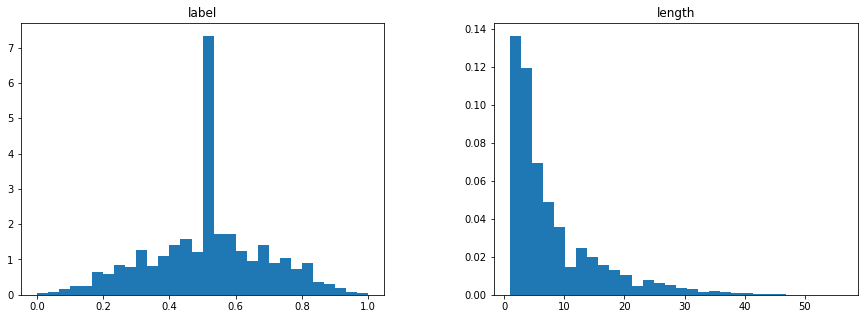

In [6]:
phrases.hist(column=['label', 'length'], bins=30, density=True, figsize=(15,5), grid=False)

The overall sentiment of all the phrases are globally neutral, we also see that we have very few phrases labeled with extreme sentiment degree (very negative or very positive). Moreover, we see that the biggest part of the dataset is represented by phrases with 5 or less tokens.

### Sentiment for different n-gram lengths

In [11]:
import matplotlib.pyplot as plt

def plot_n_gram(n_gram):

  labels_n = []

  for i in range(len(phrases['length'])):
    if phrases['length'][i] == n_gram:
      labels_n.append(phrases['label'][i])

  plt.hist(labels_n, bins=30, density=True)
  plt.title("n-gram = {}".format(n_gram))
  plt.show()

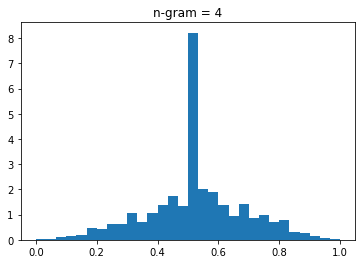

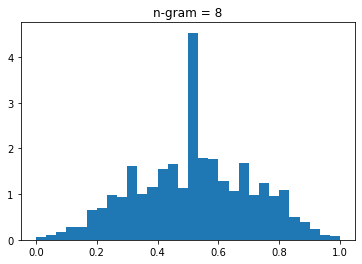

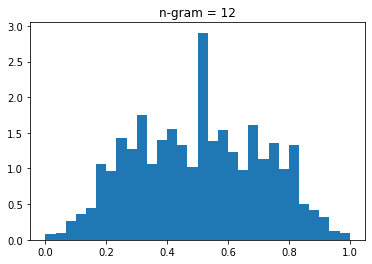

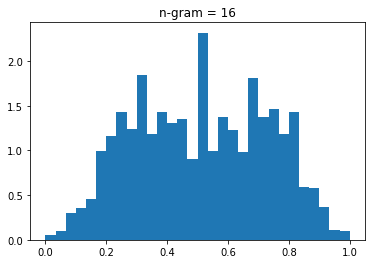

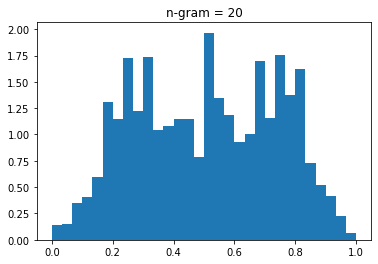

In [12]:
for n in range(1, 6):
  plot_n_gram(n*4)

From the previous plots, we can see that as the *n-gram* grows, phrase's sentiments are more polarized. This suggests that a longer phrase contains more information to decide whether if one phrase expresses a  clear sentiment ; while shorter phrases suffer from the lack of context and are most of time classify as neutral.

### Best scoring phrases

In [106]:
# get the indexes fo phrases which score is the highest = 1
idx = [i for i, j in enumerate(data_dict['dictionary']['label']) if j == 1.0]

# little overview of what a 'very positive' phrase looks like
for i in idx[:5]:
  print(data_dict['dictionary']['phrase'][i])

! Brilliant ! '
'' Far From Heaven '' is a masterpiece .
's a glorious groove that leaves you wanting more .
's the best film of the year so far , the benchmark against which all other Best Picture contenders should be measured
( reynolds ) takes a classic story , casts attractive and talented actors and uses a magnificent landscape to create a feature film that is wickedly fun to watch


In [95]:
len(idx)

136

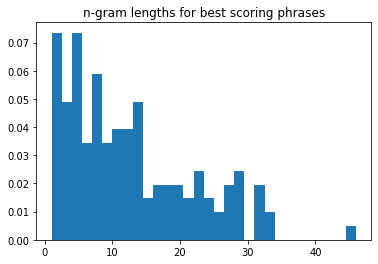

Average length for the best scoring phrases is : 12.397058823529411 tokens


In [108]:
sum = 0
length = []
for i in idx:
  sum += len(word_tokenize(data_dict['dictionary']['phrase'][i]))
  length.append(len(word_tokenize(data_dict['dictionary']['phrase'][i])))

plt.hist(length, bins=30, density=True)
plt.title("n-gram lengths for best scoring phrases")
plt.show()

print("Average length for the best scoring phrases is : {} tokens".format(sum/len(idx)))

### Worst scoring phrases

In [109]:
# get the indexes fo phrases which score is the lowest = 0
idx = [i for i, j in enumerate(data_dict['dictionary']['label']) if j == 0.0]

# little overview of what a 'very negative' phrase looks like
for i in idx[:5]:
  print(data_dict['dictionary']['phrase'][i])

's a movie that ends with Truckzilla , for cryin ' out loud . If that does n't clue you in that something 's horribly wrong , nothing will
's a terrible movie in every regard
, I hate it .
, I have given this movie a rating of zero .
, he took three minutes of dialogue , 30 seconds of plot and turned them into a 90-minute movie that feels five hours long .


In [97]:
len(idx)

159

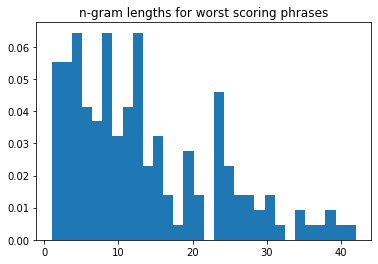

Average length for the worst scoring phrases is : 13.352201257861635 tokens


In [110]:
sum = 0
length = []
for i in idx:
  sum += len(word_tokenize(data_dict['dictionary']['phrase'][i]))
  length.append(len(word_tokenize(data_dict['dictionary']['phrase'][i])))

plt.hist(length, bins=30, density=True)
plt.title("n-gram lengths for worst scoring phrases")
plt.show()

print("Average length for the worst scoring phrases is : {} tokens".format(sum/len(idx)))

# Determine sentences sentiment with StanfordCoreNLP client

Since the original code from the paper was written in Java, we can't directly access it. Still, we can use the python client to process our data with the StanfordCoreNLP package via a Java server. This isn't optimal but it has the benefit to avoid us dealing with some Java code (thank god).

### Installing Stanza

In [15]:
# Install stanza
!pip install stanza

import stanza

     |████████████████████████████████| 432 kB 27.0 MB/s 
     |████████████████████████████████| 170 kB 53.6 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=3848588468dfd1972bf4db2cf4696b8f02d521ebe1e2e2f1f04e46252ec35c9b
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


### Setting up Stanford CoreNLP

In order for the interface to work, the Stanford CoreNLP library has to be installed and a `CORENLP_HOME` environment variable has to be pointed to the installation location.

In [16]:
# Download the Stanford CoreNLP package with Stanza's installation command
# This'll take several minutes, depending on the network speed
corenlp_dir = './corenlp'
stanza.install_corenlp(dir=corenlp_dir)

# Set the CORENLP_HOME environment variable to point to the installation location
import os
os.environ["CORENLP_HOME"] = corenlp_dir

2021-11-11 20:28:38 INFO: Installing CoreNLP package into ./corenlp...


2021-11-11 20:28:48 WARNING: For customized installation location, please set the `CORENLP_HOME` environment variable to the location of the installation. In Unix, this is done with `export CORENLP_HOME=./corenlp`.


### Constructing CoreNLPClient

At a high level, the CoreNLP Python interface works by first starting a background Java CoreNLP server process, and then initializing a client instance in Python which can pass the text to the background server process, and accept the returned annotation results.

These functionalities are wrapped in a `CoreNLPClient` class. Therefore, we need to start by importing this class from Stanza.

In [17]:
# Import client module
from stanza.server import CoreNLPClient

### Annotating Text
What sentence(s) would you like to annotate ?

Note that although in general annotations are very fast, the first annotation might take a while to complete in the notebook. Please stay patient.

In [107]:
#@title Type your sentence(s) { run: "auto", form-width: "95.5%", display-mode: "form" }

txt_input = "What a gorgeous piece of art ! I love this actor but I was bored. " #@param {type:"string"}

Let's now send the sentence(s) you wrote to the server for it (them) to be annotated  
The following code will display the overall sentiment of each sentence as well as all the sentiment of each word of the sentence.  

Note that among available annotators we could have also perform POS, NER and also lemmatization on our input text.

In [19]:
print("Starting a server...")
with CoreNLPClient(annotators=['tokenize', 'sentiment'], 
                   memory='4G', endpoint='http://localhost:9001', be_quiet=True) as client:
    text = txt_input
    document = client.annotate(text)

    print("{:30s}\t{}".format("Word", "Sentiment value"))
    for i, sent in enumerate(document.sentence):
        print("[Sentence {}] is {}".format(i+1, sent.sentiment))
        for t in sent.token:
            print("{:30s}\t{}".format(t.word, t.sentiment))

print("\nThe server should be stopped upon exit from the \"with\" statement.")

2021-11-11 20:29:02 INFO: Writing properties to tmp file: corenlp_server-350a03c0722b4464.props
2021-11-11 20:29:02 INFO: Starting server with command: java -Xmx4G -cp ./corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9001 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-350a03c0722b4464.props -annotators tokenize,sentiment -preload -outputFormat serialized


Starting a server...
Word                          	Sentiment value
[Sentence 1] is Positive
What                          	Neutral
a                             	Neutral
gorgeous                      	Positive
piece                         	Neutral
of                            	Neutral
art                           	Neutral
!                             	Neutral
[Sentence 2] is Negative
I                             	Neutral
love                          	Very positive
this                          	Neutral
actor                         	Neutral
but                           	Neutral
I                             	Neutral
was                           	Neutral
bored                         	Negative
.                             	Neutral

The server should be stopped upon exit from the "with" statement.


You can also print the annotated parse tree for the sentence you like :

In [20]:
# parse tree of the first sentence
document.sentence[0].annotatedParseTree

child {
  child {
    child {
      value: "What"
      yieldBeginIndex: 0
      yieldEndIndex: 0
    }
    value: "WHNP"
    yieldBeginIndex: 0
    yieldEndIndex: 0
    sentiment: NEUTRAL
  }
  child {
    child {
      child {
        child {
          value: "a"
          yieldBeginIndex: 1
          yieldEndIndex: 1
        }
        value: "DT"
        yieldBeginIndex: 1
        yieldEndIndex: 1
        sentiment: NEUTRAL
      }
      child {
        child {
          child {
            value: "gorgeous"
            yieldBeginIndex: 2
            yieldEndIndex: 2
          }
          value: "JJ"
          yieldBeginIndex: 2
          yieldEndIndex: 2
          sentiment: WEAK_POSITIVE
        }
        child {
          child {
            value: "piece"
            yieldBeginIndex: 3
            yieldEndIndex: 3
          }
          value: "NN"
          yieldBeginIndex: 3
          yieldEndIndex: 3
          sentiment: NEUTRAL
        }
        value: "@NP"
        yieldBegi

# Transfer learning : can the model performs on some other textual data ?

In this part, we will try out how the RNTN perform on another small dataset, which data are quite different from the ones it's been trained on. 

We will use the following test set :    
- Sentences from yelp restaurants reviews

This dataset has been first introduced in : ***'From Group to Individual Labels using Deep Features'***, Kotzias et. al,. KDD 2015 and contains 1000 sentences, took from restaurants reviews, each of these being labeled either positive (1) or negative (0).


In [29]:
# Import dataset
!gdown --id 1kTkMP7v13ua3hiatQBZEWVcpOrggMZ0D

Downloading...
From: https://drive.google.com/uc?id=1kTkMP7v13ua3hiatQBZEWVcpOrggMZ0D
To: /content/yelp_labelled.txt
100% 61.3k/61.3k [00:00<00:00, 539kB/s]


In [30]:
# format the .txt file 
f_yelp = open("/content/yelp_labelled.txt", "r")

data_yelp = []
label_yelp = []
  
for d in f_yelp.readlines():
    arr = d.split("\t")
    data_yelp.append(arr[0])
    label_yelp.append(arr[1])

In [31]:
print(len(data_yelp))

1000


We are now spliting the five hundreds firts sentences into two parts in order to avoid some runtime error when using the Java server and not to wait too long.

In [32]:
yelp_split = []
for i in range(2):
  yelp_split.append(' '.join(data_yelp[250 * i : 250 * (i+1)]))

### Getting predictions for Yelp dataset

In [58]:
pred_yelp = []
print("Starting a server...")
for elem in yelp_split:
  with CoreNLPClient(annotators=['sentiment'], 
                    memory='4G', endpoint='http://localhost:9001', be_quiet=True) as client:
      text = elem
      document = client.annotate(text)

      for sent in document.sentence:
        if sent.sentiment == "Positive":
          pred_yelp.append(1)
        elif sent.sentiment == "Negative":
          pred_yelp.append(0)
        else:
          pred_yelp.append(0.5)

print("\nThe server should be stopped upon exit from the \"with\" statement.")

2021-11-11 21:01:05 INFO: Writing properties to tmp file: corenlp_server-69ab675606db47e6.props
2021-11-11 21:01:05 INFO: Starting server with command: java -Xmx4G -cp ./corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9001 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-69ab675606db47e6.props -annotators sentiment -preload -outputFormat serialized


Starting a server...


2021-11-11 21:01:41 INFO: Writing properties to tmp file: corenlp_server-77816a1b20c34621.props
2021-11-11 21:01:41 INFO: Starting server with command: java -Xmx4G -cp ./corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9001 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-77816a1b20c34621.props -annotators sentiment -preload -outputFormat serialized



The server should be stopped upon exit from the "with" statement.


In [59]:
len(pred_yelp)

500

We check how much "neutral" predictions the model has returned.

In [60]:
sum(pred == 0.5 for pred in pred_yelp)

130

We format the pred outputs so that we can compare those with the original labels. 
To keep things simple, we'll first just convert neutral predictions into negative ones (assuming the model returns a random classification for those sentences). This is a bit arbitrary but since the server doesn't provide us the detailed score of each sentence, we have to deal with those neutral predictions in some way.  
We'll also check the accuracy only for the positive/negative predictions right after.

In [80]:
def format_labels(predictions):  
  pred_yelp_binary = []
  for pred in predictions:
    if pred == 1:
      pred_yelp_binary.append('1\n')
    else:
      pred_yelp_binary.append('0\n')
  return pred_yelp_binary

### Results with neutral predicitons

In [81]:
from sklearn.metrics import confusion_matrix

pred_yelp_binary = format_labels(pred_yelp)
confusion_matrix(label_yelp[:500], pred_yelp_binary)

array([[167,  52],
       [133, 148]])

We finally reach out near 60% accuracy on the first 500 sentences, on a dataset which the model has not been trained on, which, I guess, is kind honorable result considering that yelp reviews are about restaurants and not movies and that we probably got 'unfair' mistakes from around half of the 'neutral' predictions, that is, nearly 13% of our total test set.

### Results without neutral predictions

In [70]:
pred_no_neutral = list(filter(lambda x: x != 0.5, pred_yelp))

idx = [i for i, j in enumerate(pred_yelp) if j == 0.5]
labels_no_neutral = []
for i, j in enumerate(label_yelp[:500]):
  if i not in idx:
    labels_no_neutral.append(j)

In [82]:
pred_no_neutral_binary = format_labels(pred_no_neutral)
confusion_matrix(labels_no_neutral, pred_no_neutral_binary)

array([[111,  52],
       [ 59, 148]])

When we remove the neutral predictions, we are improving the accuracy by almost 10%, reaching now 70% on the 370 sentences the RNTN predicted to be either positive or negative.